In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
#read the data from the csv file
df1 = pd.read_csv('/Users/sangeetha/Documents/anly-501-project-Sangeetha-238/501-project-website/data/new_data1.csv')
df1.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,GW,Food systems waste disposal,840,United States of America,7230,Emissions (N2O),6988,Domestic wastewater,1990,1990,kilotonnes,10.629803,E,NaN
1,GW,Food systems waste disposal,840,United States of America,7230,Emissions (N2O),6988,Domestic wastewater,1991,1991,kilotonnes,10.934600,E,NaN
2,GW,Food systems waste disposal,840,United States of America,7230,Emissions (N2O),6988,Domestic wastewater,1992,1992,kilotonnes,11.138956,E,NaN
3,GW,Food systems waste disposal,840,United States of America,7230,Emissions (N2O),6988,Domestic wastewater,1993,1993,kilotonnes,11.335046,E,NaN
4,GW,Food systems waste disposal,840,United States of America,7230,Emissions (N2O),6988,Domestic wastewater,1994,1994,kilotonnes,11.754348,E,NaN


In [186]:
#remove unwanted columns
df1.drop(['Domain Code','Area Code (M49)','Element Code','Item Code','Year Code','Flag Description','Unit','Flag'],axis=1,inplace=True)

In [187]:
#check for null values
df1.isnull().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Value      0
dtype: int64

In [188]:
#import data from the csv file
df2 = pd.read_csv('/Users/sangeetha/Documents/anly-501-project-Sangeetha-238/501-project-website/data/new_data2.csv')
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GB,Burning - Crop Residues,840,United States of America,7245,Biomass burned (dry matter),112,Maize (corn),1961,1961,3050,FAO TIER 1,tonnes,2.332301e+07,E,Estimated value,NaN
1,GB,Burning - Crop Residues,840,United States of America,7230,Emissions (N2O),112,Maize (corn),1961,1961,3050,FAO TIER 1,kilotonnes,1.632600e+00,E,Estimated value,NaN
2,GB,Burning - Crop Residues,840,United States of America,7225,Emissions (CH4),112,Maize (corn),1961,1961,3050,FAO TIER 1,kilotonnes,6.297210e+01,E,Estimated value,NaN
3,GB,Burning - Crop Residues,840,United States of America,7245,Biomass burned (dry matter),112,Maize (corn),1962,1962,3050,FAO TIER 1,tonnes,2.255101e+07,E,Estimated value,NaN
4,GB,Burning - Crop Residues,840,United States of America,7230,Emissions (N2O),112,Maize (corn),1962,1962,3050,FAO TIER 1,kilotonnes,1.578600e+00,E,Estimated value,NaN


In [189]:
#remove unwanted columns
df2.drop(['Domain Code','Area Code (M49)','Element Code','Year Code','Flag Description','Unit','Source Code','Source','Item Code (CPC)','Note','Flag'],axis=1,inplace=True)


In [190]:
#check for null values
df1.isnull().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Value      0
dtype: int64

In [191]:
#merge the two dataframes
df = pd.concat([df1,df2],axis=0)
df.head()

,Domain,Area,Element,Item,Year,Value
0,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1990,10.629803
1,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1991,10.934600
2,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1992,11.138956
3,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1993,11.335046
4,Food systems waste disposal,United States of America,Emissions (N2O),Domestic wastewater,1994,11.754348


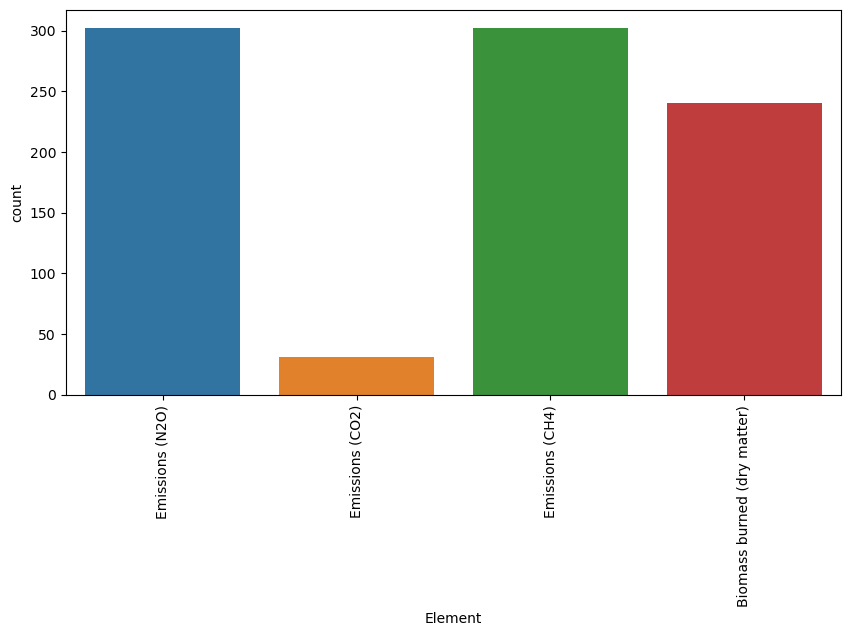

In [194]:
#plot a bar graph to show different elements
plt.figure(figsize=(10,5))
sns.countplot(x='Element',data=df)
plt.xticks(rotation=90)
plt.show()



<Figure size 4000x4000 with 0 Axes>

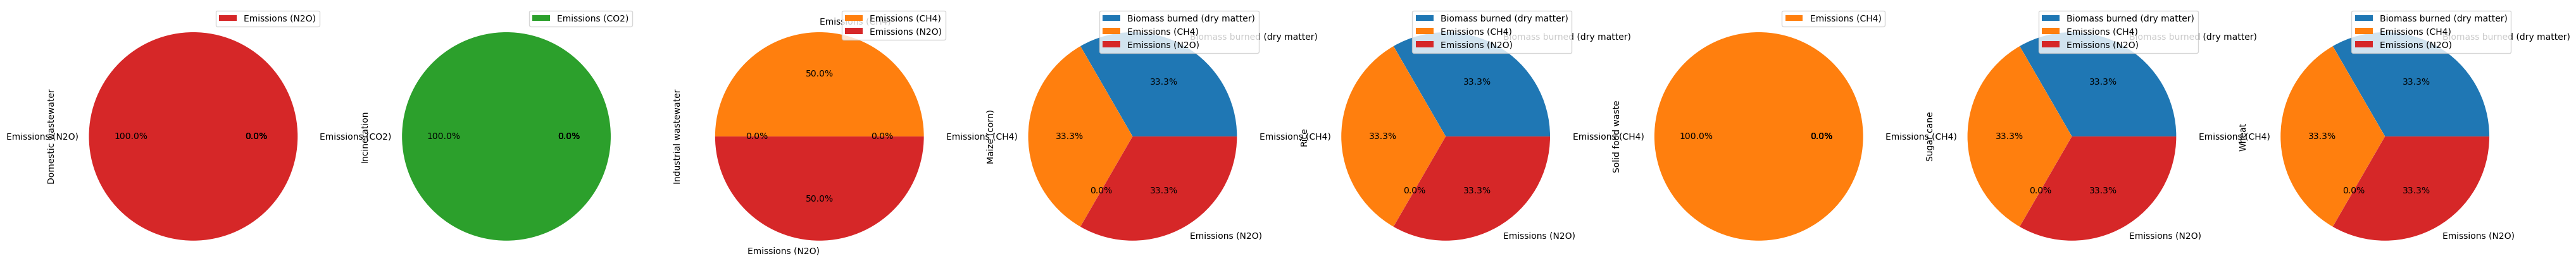

In [205]:
plt.figure(figsize=(40,40))
df.groupby(['Element','Item']).size().unstack().plot(kind='pie',subplots=True,figsize=(50,50),autopct='%1.1f%%')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df['Element'] = le.fit_transform(df['Element'])
df['Item'] = le.fit_transform(df['Item'])
df['Domain'] = le.fit_transform(df['Domain'])

In [ ]:
X = df.drop(['Element'],axis=1)
y = df['Element']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=46)
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score: 0.7452471482889734
Confusion Matrix: [[ 73   0   0   0]
 [  0   9   0  67]
 [  0   0  10   0]
 [  0   0   0 104]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      0.12      0.21        76
           2       1.00      1.00      1.00        10
           3       0.61      1.00      0.76       104

    accuracy                           0.75       263
   macro avg       0.90      0.78      0.74       263
weighted avg       0.85      0.75      0.68       263



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


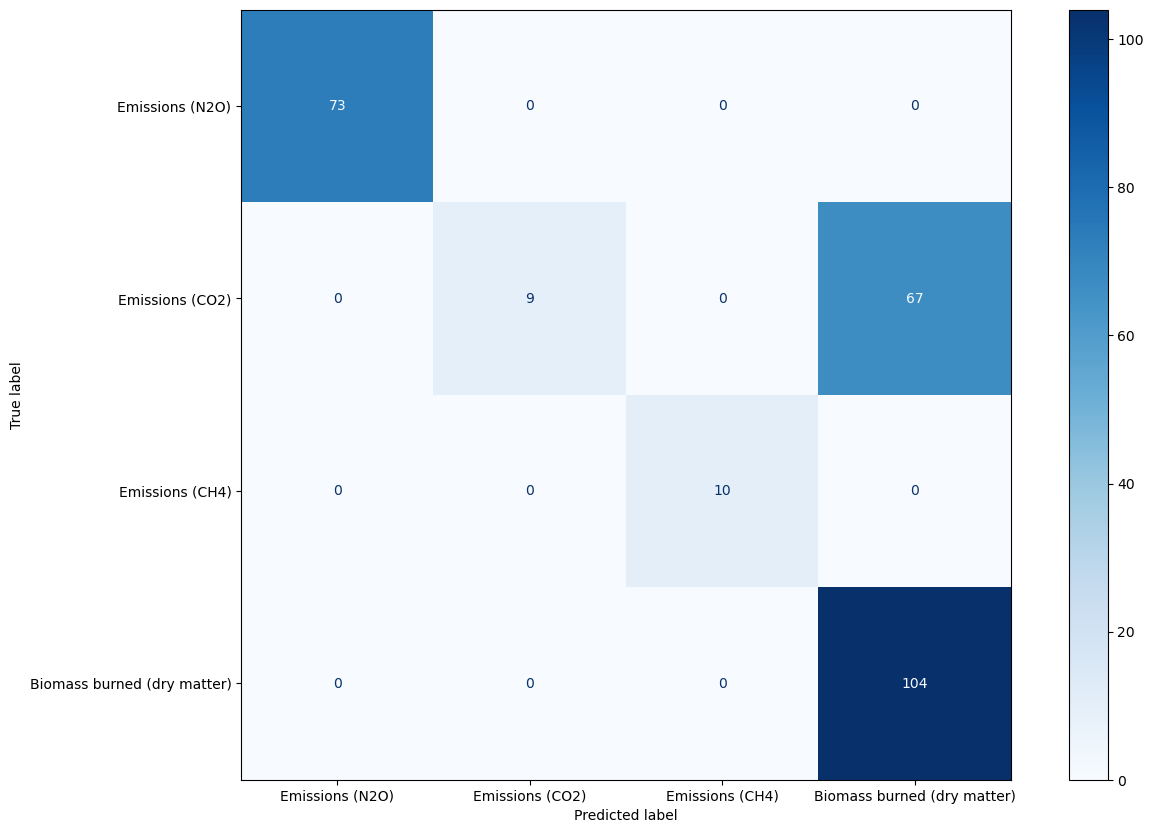

In [202]:
from sklearn.metrics import plot_confusion_matrix
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(gnb,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()

In [ ]:
#SVM Classifier on df
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))
print('Classification Report:',classification_report(y_test,y_pred))

Accuracy Score: 0.4714828897338403
Confusion Matrix: [[ 48  25   0   0]
 [  0  76   0   0]
 [  0  10   0   0]
 [  0 104   0   0]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.66      0.79        73
           1       0.35      1.00      0.52        76
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00       104

    accuracy                           0.47       263
   macro avg       0.34      0.41      0.33       263
weighted avg       0.38      0.47      0.37       263



/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

/Users/sangeetha/opt/anaconda3/envs/ANLY501/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


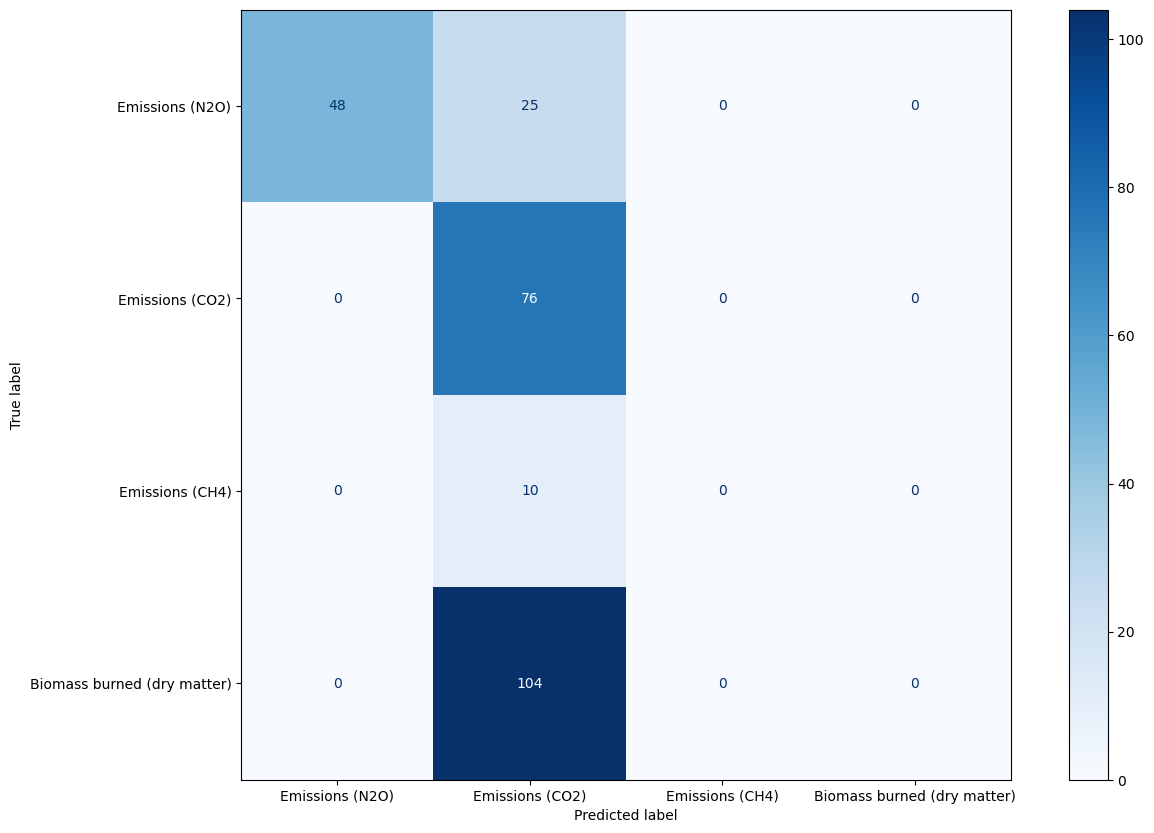

In [206]:
#plot confusion matrix for svm classifier with labels
fig,ax=plt.subplots(figsize=(15,10))
plot_confusion_matrix(svc,X_test,y_test,display_labels=['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)','Biomass burned (dry matter)'],cmap=plt.cm.Blues,ax=ax)
plt.show()